# Extracting Signatures from Document Images Using Connected Components Analysis

In this notebook we show how to extract signatures from scanned or photographed document pictures using computer vision techniques. It specifically uses Connected Components Analysis (CCA) to detect regions of interest within a binarized document picture. The procedure consists of importing and preprocessing a picture, separating related components based on size, and filtering for regions likely to contain signatures. The separated components are then stored as separate picture files for later processing or storage. This approach is beneficial for automated signature extraction in applications such as document verification and archiving.

# 1. Imports 

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# 2. Define utility functions
This cell defines two utility functions:

- display_image: A helper function to visualize images using Matplotlib.
- extract_signatures: A function that applies Connected Components Analysis (CCA) to identify connected regions in a binary image and filters them based on area constraints, isolating potential signatures.

In [9]:
def display_image(image, title="Image", cmap='gray'):
    """Utility function to display an image."""
    plt.figure(figsize=(8, 6))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

def extract_signatures(image, min_area=100, max_area=2000, min_aspect_ratio=1.5, max_aspect_ratio=6.0):
    """
    Extracts connected components that could correspond to signatures.
    
    Parameters:
        image (numpy.ndarray): Binary image.
        min_area (int): Minimum area of a connected component.
        max_area (int): Maximum area of a connected component.
        min_aspect_ratio (float): Minimum aspect ratio (width/height) of a component.
        max_aspect_ratio (float): Maximum aspect ratio (width/height) of a component.
        
    Returns:
        list: List of bounding boxes for the extracted components.
    """
    # Perform connected components analysis
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image, connectivity=8)

    # Filter components based on size and aspect ratio
    extracted_boxes = []
    for i in range(1, num_labels):  # Skip the background (label 0)
        x, y, w, h, area = stats[i]
        aspect_ratio = w / h
        if min_area < area < max_area and min_aspect_ratio < aspect_ratio < max_aspect_ratio:
            extracted_boxes.append((x, y, w, h))
    return extracted_boxes


# 3. Load and preprocess the document image
This cell loads the input document image in grayscale format and preprocesses it for analysis. It applies Otsu's thresholding to convert the image into a binary format, inverting the colors so that the foreground (text and signatures) appears white on a black background. The binary image is displayed for verification.

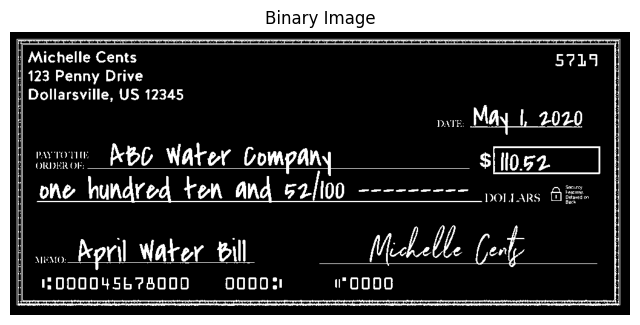

In [ ]:
# Load image
image_path = "example.jpg"  # Update with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Binarize the image using Otsu's thresholding
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Display the binary image
display_image(binary_image, "Binary Image")


# 4. Extract potential signatures
This cell uses the previously defined extract_signatures function to identify connected components that match the size criteria for signatures. Bounding boxes are drawn around the identified regions, and the processed image is displayed to visualize the results.

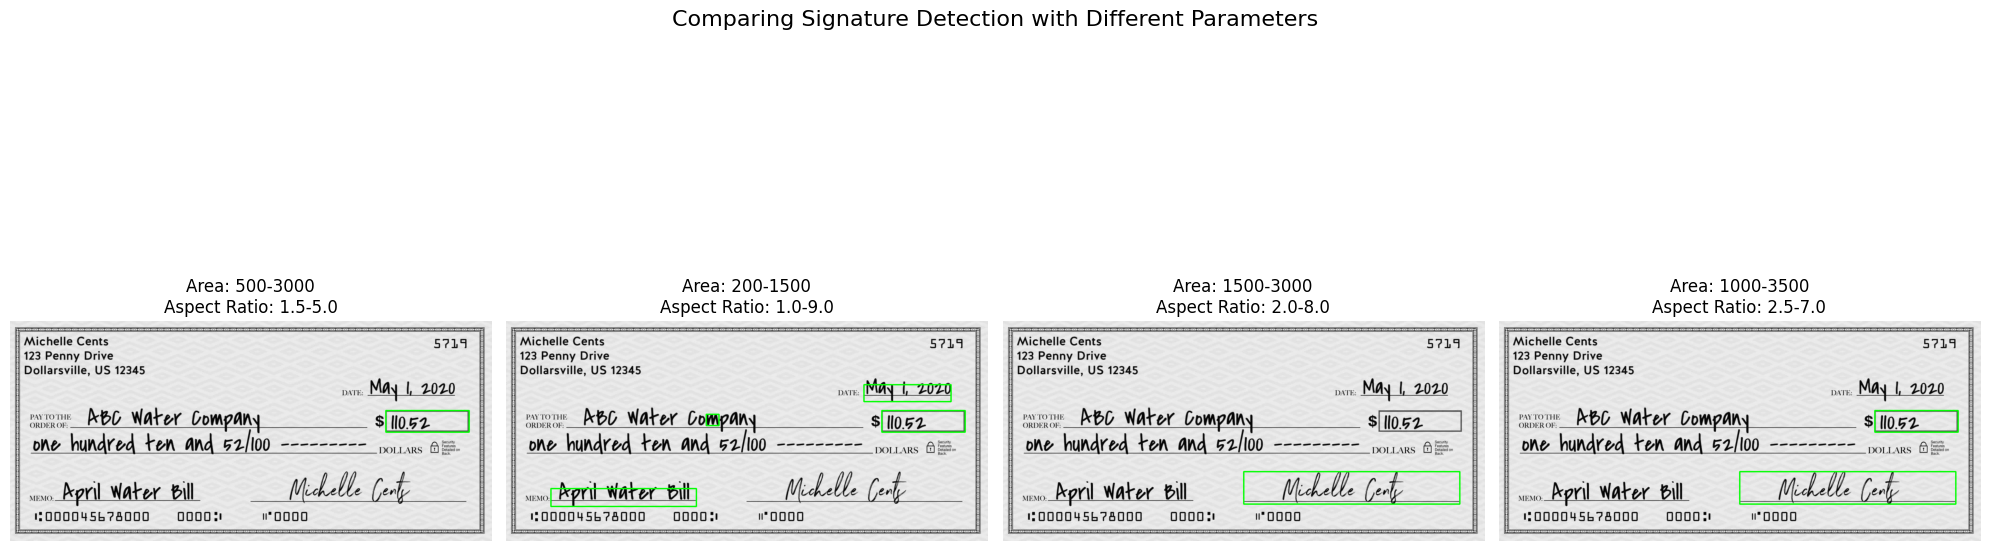

In [ ]:
# Define parameter combinations to test
parameter_sets = [
    {"min_area": 500, "max_area": 3000, "min_aspect_ratio": 1.5, "max_aspect_ratio": 5.0},
    {"min_area": 200, "max_area": 1500, "min_aspect_ratio": 1.0, "max_aspect_ratio": 9.0},
    {"min_area": 1500, "max_area": 3000, "min_aspect_ratio": 2.0, "max_aspect_ratio": 8.0}, 
    {"min_area": 1000, "max_area": 3500, "min_aspect_ratio": 2.5, "max_aspect_ratio": 7.0},
]

# Prepare a figure for displaying the results
fig, axes = plt.subplots(1, len(parameter_sets), figsize=(20, 8))
fig.suptitle("Comparing Signature Detection with Different Parameters", fontsize=16)

# Process each parameter set and visualize the results
for i, params in enumerate(parameter_sets):
    # Extract signatures using the current parameter set
    signature_boxes = extract_signatures(
        binary_image, 
        min_area=params["min_area"], 
        max_area=params["max_area"], 
        min_aspect_ratio=params["min_aspect_ratio"], 
        max_aspect_ratio=params["max_aspect_ratio"]
    )
    
    # Create a copy of the original image with bounding boxes
    output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    for x, y, w, h in signature_boxes:
        cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    # Plot the result
    axes[i].imshow(output_image)
    axes[i].set_title(
        f"Area: {params['min_area']}-{params['max_area']}\n"
        f"Aspect Ratio: {params['min_aspect_ratio']}-{params['max_aspect_ratio']}"
    )
    axes[i].axis("off")

# Show the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


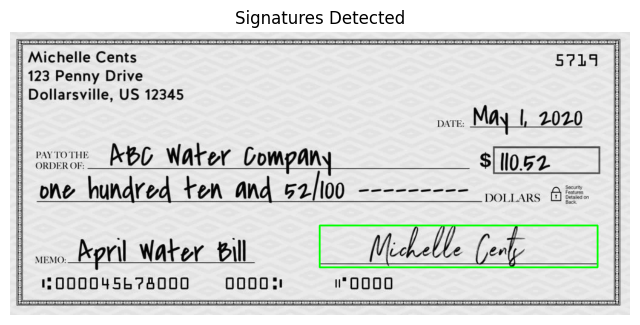

In [19]:
min_area = 1500      # Minimum area of a component
max_area = 3000     # Maximum area of a component
min_aspect_ratio = 2.0  # Minimum aspect ratio
max_aspect_ratio = 8.0  # Maximum aspect ratio

signature_boxes = extract_signatures(binary_image, min_area, max_area, min_aspect_ratio, max_aspect_ratio)

# Draw bounding boxes around detected signatures
output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for x, y, w, h in signature_boxes:
    cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with bounding boxes
display_image(output_image, "Signatures Detected")
